In [1]:
from scipy import stats

In [2]:
import pandas as pd
import numpy as np

In [3]:
wine = pd.read_csv(r"D:\Dokumen\Python\Data Engineering 1\Wine.csv")

In [4]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
wine['Ash'].mean()

2.3665168539325845

In [6]:
stats.trim_mean(wine['Ash'], 0.1)

2.37375

In [7]:
wine['Ash'].median()

2.36

In [8]:
import wquantiles

In [9]:
np.average(wine['Ash'], weights=wine['Alcohol'])

2.3701205647095427

In [10]:
wquantiles.median(wine['Ash'], weights=wine['Alcohol'])

2.36

In [11]:
wine['Ash'].std()

0.2743440090608148

In [12]:
wine['Ash'].quantile(0.75) - wine['Ash'].quantile(0.25)

0.34750000000000014

In [13]:
import statsmodels as sm

In [14]:
from statsmodels import robust

In [15]:
robust.scale.mad(wine['Ash'])

0.23721635496089585

In [16]:
wine['Ash'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.9200
0.25    2.2100
0.50    2.3600
0.75    2.5575
0.95    2.7415
Name: Ash, dtype: float64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

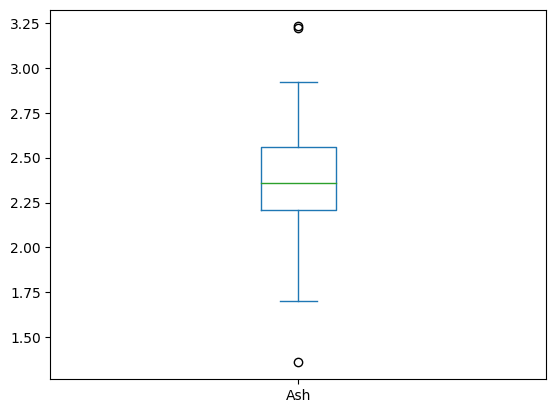

In [18]:
ax = wine['Ash'].plot.box()

In [19]:
binnedAsh = pd.cut(wine['Ash'], 10)

In [20]:
print(binnedAsh)

0      (2.295, 2.482]
1      (2.108, 2.295]
2      (2.669, 2.856]
3      (2.482, 2.669]
4      (2.856, 3.043]
            ...      
173    (2.295, 2.482]
174    (2.295, 2.482]
175    (2.108, 2.295]
176    (2.295, 2.482]
177    (2.669, 2.856]
Name: Ash, Length: 178, dtype: category
Categories (10, interval[float64, right]): [(1.358, 1.547] < (1.547, 1.734] < (1.734, 1.921] < (1.921, 2.108] ... (2.482, 2.669] < (2.669, 2.856] < (2.856, 3.043] < (3.043, 3.23]]


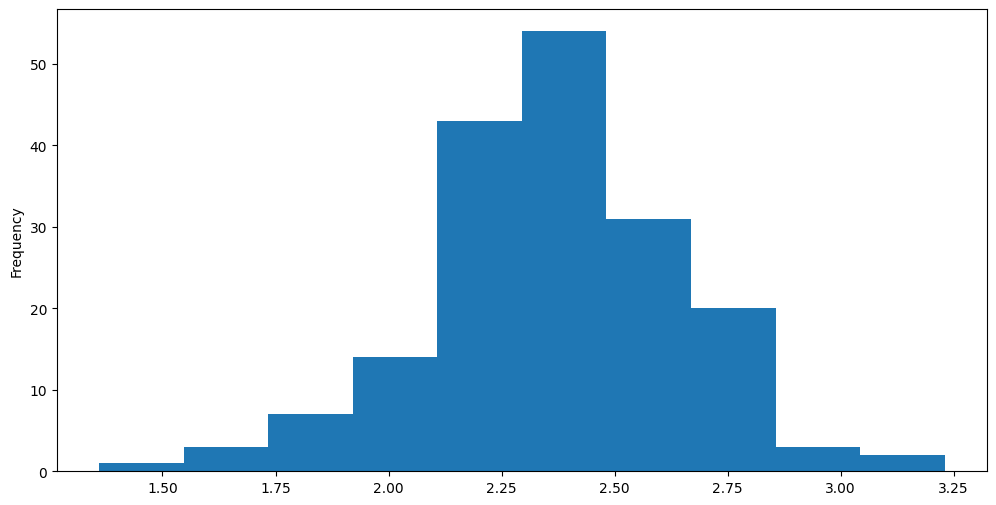

In [21]:
ax = wine['Ash'].plot.hist(figsize=(12,6))

<Axes: ylabel='Density'>

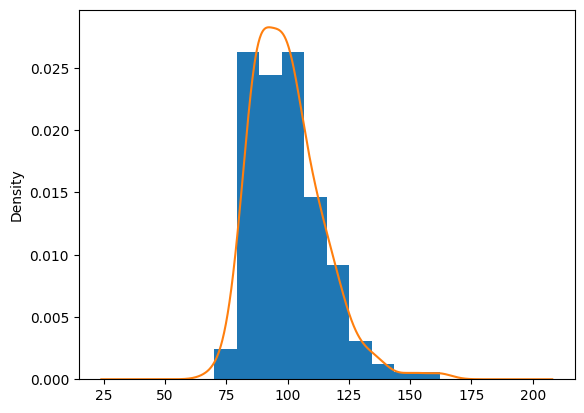

In [22]:
ax = wine['Magnesium'].plot.hist(density= True)
wine['Magnesium'].plot.density(ax=ax)

In [23]:
results =[]
for nrepeat in range(1000):
    results.append(wine['Ash'].median())

In [24]:
results = pd.Series(results)

In [25]:
print('Bootstrap Statistics:')
print(f'original: {wine["Ash"].median()}')
print(f'bias: {results.mean() - wine["Ash"].median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 2.36
bias: 0.0
std. error: 2.1326948214112358e-14


((array([-2.66177307, -2.34817197, -2.16905154, -2.04058863, -1.93897243,
         -1.85415032, -1.78088879, -1.71610087, -1.65780642, -1.60465611,
         -1.5556873 , -1.51018811, -1.46761661, -1.42755024, -1.38965286,
         -1.35365247, -1.31932572, -1.28648685, -1.2549796 , -1.2246712 ,
         -1.19544787, -1.16721129, -1.13987588, -1.11336669, -1.08761764,
         -1.06257021, -1.03817226, -1.01437714, -0.99114294, -0.96843183,
         -0.94620956, -0.924445  , -0.90310978, -0.88217792, -0.86162563,
         -0.841431  , -0.82157384, -0.80203546, -0.78279857, -0.76384709,
         -0.74516607, -0.72674155, -0.7085605 , -0.6906107 , -0.67288071,
         -0.65535977, -0.63803775, -0.62090509, -0.60395279, -0.5871723 ,
         -0.57055555, -0.55409487, -0.53778298, -0.52161295, -0.50557818,
         -0.48967236, -0.47388947, -0.45822376, -0.44266971, -0.42722203,
         -0.41187564, -0.39662564, -0.38146734, -0.36639619, -0.35140781,
         -0.33649796, -0.32166255, -0.

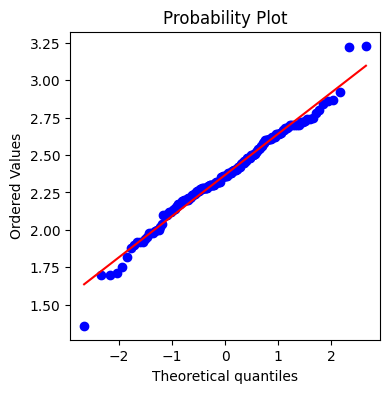

In [26]:
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(wine['Ash'], plot = ax)


In [27]:
stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [28]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144

In [29]:
stats.poisson.rvs(2, size=100)

array([2, 0, 2, 2, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 2, 3, 3, 1, 1, 1, 3,
       0, 0, 6, 4, 1, 0, 3, 3, 1, 4, 1, 3, 1, 3, 3, 4, 2, 1, 1, 2, 3, 2,
       1, 2, 4, 5, 3, 3, 5, 2, 2, 1, 1, 1, 2, 3, 2, 3, 4, 0, 3, 0, 3, 1,
       3, 1, 0, 3, 1, 5, 6, 4, 1, 2, 3, 0, 2, 3, 1, 2, 1, 1, 3, 3, 3, 4,
       0, 3, 2, 0, 2, 2, 0, 1, 3, 0, 1, 2], dtype=int64)

In [30]:
stats.expon.rvs(0.2, size=100)

array([0.94384768, 1.14825551, 0.9952322 , 0.46190613, 0.35386586,
       1.56961736, 0.472913  , 1.38894499, 0.50858894, 0.22587488,
       2.23077917, 1.56630156, 0.86049687, 1.19216647, 0.76770769,
       0.25464172, 2.94045561, 1.04043181, 0.59098084, 0.38253368,
       0.55325667, 2.8694292 , 2.66332678, 0.75370383, 0.28735534,
       1.37005954, 0.78582154, 0.62064147, 1.02886587, 1.76015619,
       0.4525588 , 0.39376208, 0.96238168, 0.95669793, 0.83991383,
       0.52956542, 0.71416167, 1.33909858, 0.41958239, 0.32613362,
       0.29546315, 1.33692939, 0.8396609 , 1.5929432 , 0.55187566,
       1.24423695, 1.35776087, 0.34940209, 1.3171599 , 1.20576344,
       2.3726331 , 2.97274625, 1.0457402 , 1.85275172, 1.15395719,
       2.74046761, 0.49572876, 1.67125619, 0.4058974 , 1.94363615,
       2.84674749, 0.57500189, 1.29142581, 0.30975368, 1.18770722,
       1.37981803, 0.63811976, 0.87731814, 1.5084879 , 1.00790285,
       0.88462445, 3.36249063, 1.60413439, 0.29533185, 0.20799

In [31]:
stats.weibull_min.rvs(1.5, scale=500, size=50)

array([324.74757176, 123.01952336, 219.94393895, 270.59740897,
       109.36517494, 187.24441095, 292.86763966, 551.47190416,
       466.65631118, 131.76726814, 319.79575107, 610.23594144,
       189.21404887, 366.01232185, 182.70270344, 275.31362736,
       537.86047946, 794.79543045, 211.69838624, 122.55662996,
        18.40279968, 249.56114472, 339.04251385, 222.70902493,
       502.42125469, 320.88787821, 389.72806858,  44.11239855,
       196.96276358, 664.08756208, 306.17927829,   5.56593849,
       751.62870261, 465.34826981, 333.08347603, 259.62786269,
       525.77792634, 245.33395462, 205.91051813, 207.84178986,
        31.62114486, 272.12071183, 361.65398205, 859.08436764,
       368.36474716, 804.88574684, 512.29380248,  39.41398535,
       377.47490571, 855.6246436 ])

In [32]:
stats.weibull_max.rvs(1.5, scale=500, size=50)

array([ -355.20605503,  -238.68570418,   -78.53724996,  -795.47313229,
        -952.83182915,  -289.90540154,  -193.99170495,  -186.75181035,
        -478.46613536,  -419.03837466,  -493.3701496 ,  -637.99816117,
        -313.18982718,  -315.88926553,  -489.32461898,  -704.3278465 ,
         -88.67537972,  -751.80478031,  -201.64698292,  -982.93882658,
         -46.91028762,  -736.02641022,  -267.59672419,  -572.11760912,
        -354.72947137,  -730.92583244,  -119.11642988,  -656.94408872,
        -352.55693225,  -201.29501659,  -563.87408228,  -453.43748292,
        -504.6000753 ,  -601.08941439,  -507.08085113,   -47.56348831,
        -239.7641591 ,  -190.96033148,  -972.78354046,  -786.89119187,
        -607.7255333 ,  -650.28787335,  -495.92319031,   -10.70118069,
        -406.5572338 , -1028.58615458,  -101.84614033,  -299.3195326 ,
        -502.20998082, -1080.69649772])